In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # for visualization 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table # for creating nice table 
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

QUESTION 1

In [2]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

QUESTION 2

In [11]:
# the discrete variables
numerical_discrete = []

for var in df.columns:
    if len(df[var].unique())<10 :
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]
target  values:  [1 0]

There are 9 discrete variables


In [17]:
numerical_continous = [var for var in df.columns if var not in numerical_discrete ]
print('the continous vars are:')
for var in numerical_continous:
    print(var)


the continous vars are:
age
trestbps
chol
thalach
oldpeak


QUESTION 3

In [18]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper


{'whiskers': [<matplotlib.lines.Line2D at 0x24d303c45e0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d307b93a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d303c57f0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d304a4a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d307d4a90>],
 'means': []}

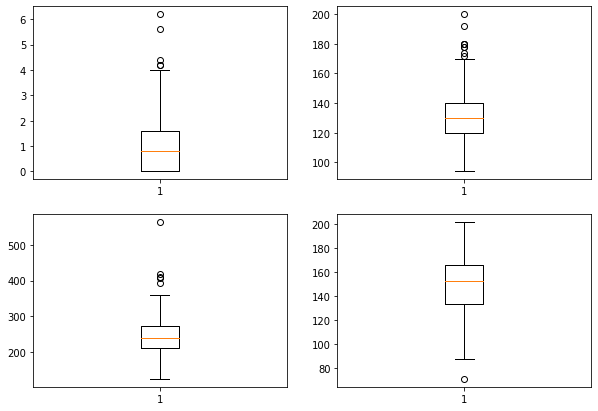

In [31]:
fig, ax = plt.subplots(2,2,figsize=(10,7))

ax[0][0].boxplot(df.oldpeak)
ax[0][1].boxplot(df.trestbps)
ax[1][0].boxplot(df.chol)
ax[1][1].boxplot(df.thalach)

In [34]:

lower, upper = remove_outlier(df.oldpeak)

df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

In [36]:
lower, upper = remove_outlier(df.trestbps)

df = df.loc[(df.trestbps > lower) & (df.trestbps < upper)]

In [37]:
lower, upper = remove_outlier(df.chol)

df = df.loc[(df.chol > lower) & (df.chol < upper)]

In [38]:
lower, upper = remove_outlier(df.thalach)

df = df.loc[(df.thalach > lower) & (df.thalach < upper)]

{'whiskers': [<matplotlib.lines.Line2D at 0x24d2c1f7f40>,
 'caps': [<matplotlib.lines.Line2D at 0x24d2d73b760>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d2c1f7820>],
 'medians': [<matplotlib.lines.Line2D at 0x24d2d73bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d2d73b610>],
 'means': []}

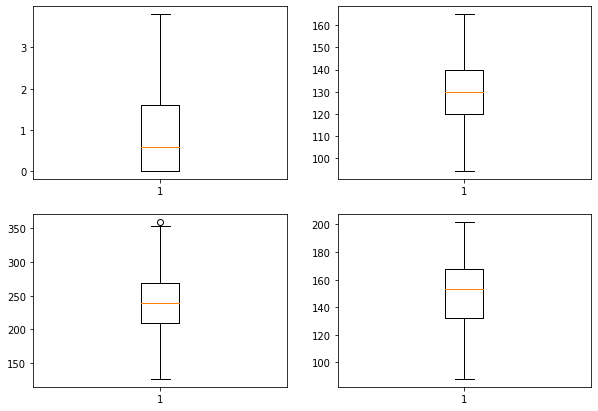

In [39]:
fig, ax = plt.subplots(2,2,figsize=(10,7))

ax[0][0].boxplot(df.oldpeak)
ax[0][1].boxplot(df.trestbps)
ax[1][0].boxplot(df.chol)
ax[1][1].boxplot(df.thalach)

In [ ]:
QUESTION 4

(array([ 1., 11., 33., 38., 35., 55., 55., 35., 13.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

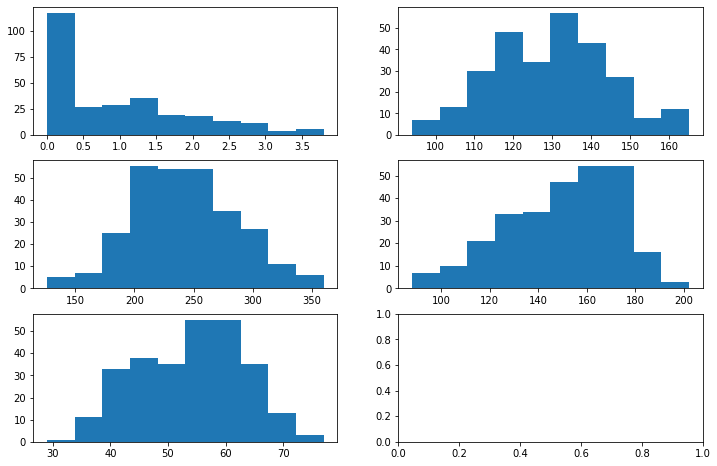

In [40]:
#2.1.3. Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(3,2,figsize=(12,8))



ax[0][0].hist(df.oldpeak)
ax[0][1].hist(df.trestbps)
ax[1][0].hist(df.chol)
ax[1][1].hist(df.thalach)
ax[2][0].hist(df.age)

In [41]:
df['age_binned'] = pd.qcut(df.age, q=[0, .25, .50, .75, 1])
df['trestbps_binned'] = pd.qcut(df.trestbps, q=[0, .25, .50, .75, 1])
df['chol_binned'] = pd.qcut(df.chol, q=[0, .25, .50, .75, 1])
df['thalach_binned'] = pd.qcut(df.thalach, q=[0, .25, .50, .75, 1])

In [42]:
df_original=df.copy() #ORIGINAL DATA 

In [86]:
df=df_original.copy()

In [87]:
df.drop(columns=['age', 'trestbps', 'chol', 'thalach'], inplace=True)

QUESTION 5

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              279 non-null    int64   
 1   cp               279 non-null    int64   
 2   fbs              279 non-null    int64   
 3   restecg          279 non-null    int64   
 4   exang            279 non-null    int64   
 5   oldpeak          279 non-null    float64 
 6   slope            279 non-null    int64   
 7   ca               279 non-null    int64   
 8   thal             279 non-null    int64   
 9   target           279 non-null    int64   
 10  age_binned       279 non-null    category
 11  trestbps_binned  279 non-null    category
 12  chol_binned      279 non-null    category
 13  thalach_binned   279 non-null    category
dtypes: category(4), float64(1), int64(9)
memory usage: 34.1 KB


In [89]:
df

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age_binned,trestbps_binned,chol_binned,thalach_binned
0,1,3,1,0,0,2.3,0,0,1,1,"(60.0, 77.0]","(140.0, 165.0]","(209.5, 239.0]","(132.5, 153.0]"
1,1,2,0,1,0,3.5,0,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(239.0, 269.5]","(168.0, 202.0]"
2,0,1,0,0,0,1.4,2,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(125.999, 209.5]","(168.0, 202.0]"
3,1,1,0,1,0,0.8,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(209.5, 239.0]","(168.0, 202.0]"
4,0,0,0,1,1,0.6,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(269.5, 360.0]","(153.0, 168.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,"(54.0, 60.0]","(130.0, 140.0]","(239.0, 269.5]","(87.999, 132.5]"
299,1,3,0,1,0,1.2,1,0,3,0,"(28.999, 46.0]","(93.999, 120.0]","(239.0, 269.5]","(87.999, 132.5]"
300,1,0,1,1,0,3.4,1,2,3,0,"(60.0, 77.0]","(140.0, 165.0]","(125.999, 209.5]","(132.5, 153.0]"
301,1,0,0,1,1,1.2,1,1,3,0,"(54.0, 60.0]","(120.0, 130.0]","(125.999, 209.5]","(87.999, 132.5]"


In [90]:
#x_a = df_a.iloc[:, 1:-1]
Y = df.iloc[:, -5]
X= df.loc[:, df.columns != 'target']
#X= df.loc[:, df.columns != 'oldpeak']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              279 non-null    int64   
 1   cp               279 non-null    int64   
 2   fbs              279 non-null    int64   
 3   restecg          279 non-null    int64   
 4   exang            279 non-null    int64   
 5   oldpeak          279 non-null    float64 
 6   slope            279 non-null    int64   
 7   ca               279 non-null    int64   
 8   thal             279 non-null    int64   
 9   age_binned       279 non-null    category
 10  trestbps_binned  279 non-null    category
 11  chol_binned      279 non-null    category
 12  thalach_binned   279 non-null    category
dtypes: category(4), float64(1), int64(8)
memory usage: 31.9 KB


In [91]:
#WOE Encoder
import category_encoders as ce

woe = ce.WOEEncoder()

def woe_encoder(col, target):
    for i in range(len(X.columns)):
        col.iloc[:,i] = woe.fit_transform(col, target)
    return col

df_woe_X = woe_encoder(X, Y)
df_woe_X.head()

C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\util

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age_binned,trestbps_binned,chol_binned,thalach_binned
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0


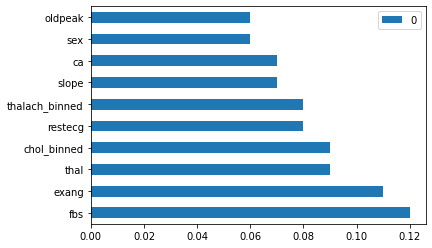

In [93]:
#PCA
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(df_woe_X, Y)


df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=X.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

In [77]:
X.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'age_binned', 'trestbps_binned', 'chol_binned',
       'thalach_binned'],
      dtype='object')

QUESTION 6 

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [95]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_train), columns=x_train.columns)
x_train_ss.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age_binned,trestbps_binned,chol_binned,thalach_binned
0,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637
1,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637
2,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763
3,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763,0.682763
4,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637,-1.464637


In [100]:
x_test_ss = pd.DataFrame(StandardScaler().fit_transform(x_test), columns=x_test.columns)
x_test_ss.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age_binned,trestbps_binned,chol_binned,thalach_binned
0,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683
1,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683
2,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683
3,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744,-1.678744
4,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683,0.595683


In [ ]:
QUESTION 7

In [96]:
target_0 = df[df.target == 0].target.count() / df.target.count()
target_1 = df[df.target == 1].target.count() / df.target.count()

print(target_0)
print(target_1)

0.4336917562724014
0.5663082437275986


In [106]:

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

x_train_ss_over, y_train_over = oversample.fit_resample(x_train_ss, y_train)
print(Counter(y_train_over))

Counter({1: 114, 0: 114})


In [107]:
x_test_ss_over, y_test_over = oversample.fit_resample(x_test_ss, y_test)
print(Counter(y_test_over))

Counter({1: 44, 0: 44})


In [ ]:
x_train_ss_over, y_train_over = oversample.fit_resample(x_train_ss, y_train)
print(Counter(y_train_over))

In [ ]:
QUESTION 8

In [98]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [105]:
y_train_over.shape

(88,)

In [108]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_ss_over, y_train_over)
    train_score = round(classifier.score(x_train_ss_over, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_test_ss_over, y_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.64, 0.64, 0.64, 0.64, 0.64]
[0.68, 0.68, 0.68, 0.68, 0.68]


In [110]:
#%% time
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_ss_over, y_train_over)
    train_score = cross_val_score(classifier, x_train_ss_over, y_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_test_ss_over, y_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)

print(test_cross_scores)

[0.64, 0.58, 0.64, 0.64, 0.64]
[0.68, 0.68, 0.68, 0.68, 0.68]
